In [7]:
import warnings
warnings.filterwarnings('ignore')
# import geoplot as gplt

import geopandas as gpd
# import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc


In [8]:
import numpy as np
import laspy
import rasterio
from rasterio import mask
import folium

In [9]:
from osgeo import gdal
import georaster as gr
import pandas as pd
import numpy as np

# Imporation of the reaster file 

In [11]:
# Read raster/tif file
# --------------------
iowa_tif = 'iowa.tif'
raster_iowa = rasterio.open(iowa_tif)
iowa_data = raster_iowa.read(1)

In [ ]:
## Plot raster/tif image
# --------------------
def plot_raster(rast_data, title=''):
    """
    Plots raster tif image both in log scale(+1) and original verion
    """
    fig, (axlog, axorg) = plt.subplots(1, 2, figsize=(14,7))
    im1 = axlog.imshow(np.log1p(rast_data)) # vmin=0, vmax=2.1)
#     im2 = axorg.imshow(rast_data)

    plt.title("{}".format(title), fontdict = {'fontsize': 15})  
    plt.axis('off')
    plt.colorbar(im1, fraction=0.03)

## Let's get a look for the raster file 

<Figure size 640x480 with 0 Axes>

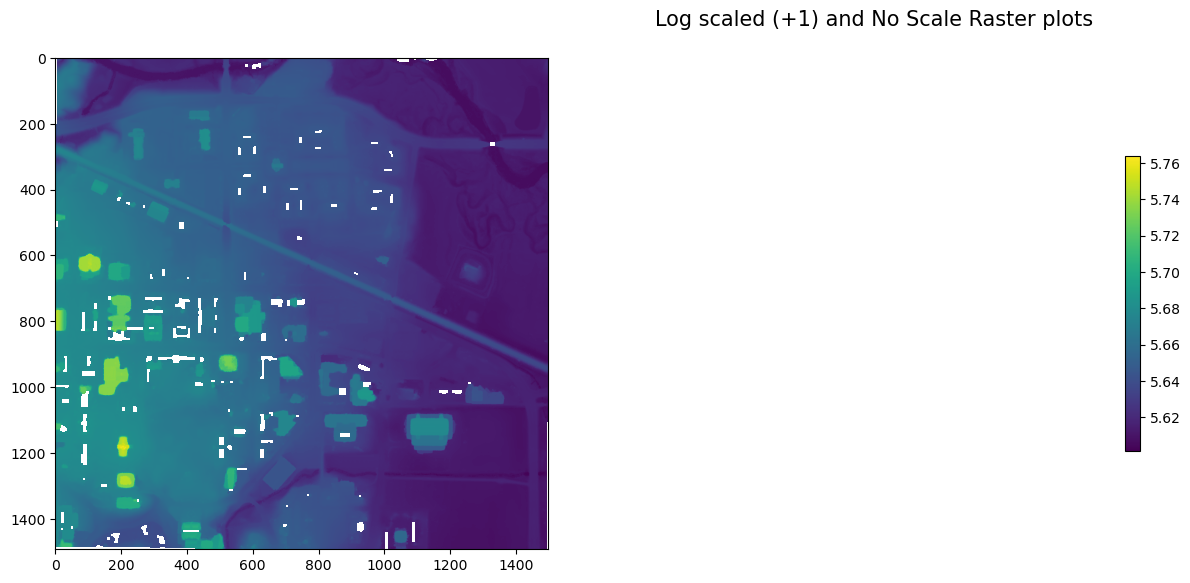

In [7]:

import matplotlib.pyplot as plt
title = 'Log scaled (+1) and No Scale Raster plots'
plt.figure(1)
plot_raster(iowa_data,title)
plt.show(block=False)

In [8]:
type(iowa_data)

numpy.ndarray

In [9]:
count = iowa_data[iowa_data > 0].sum()
count

623568522.8765813

In [11]:
# get shp from tif
from glob import glob
from shapely.geometry import box
def get_shp_from_tif(tif_path:str, shp_file_path:str) -> None:
    raster = rasterio.open(tif_path)
    bounds = raster.bounds

    df = gpd.GeoDataFrame({"id":1,"geometry":[box(*bounds)]})
   
    # save to file
    df.to_file(shp_file_path)
    print('Saved..')

In [14]:
get_shp_from_tif(iowa_tif,shp_file_path='shp/shape')




Saved..


In [25]:
stations_01 = gpd.read_file(r'shp/shape/shape.shp')

In [22]:
stations_01

,id,geometry
0,1,"POLYGON ((447611.391 4652575.193, 446112.391 4..."


# Reprojection into WGS84

In [11]:
data1= gdal.Open("iowa.tif")


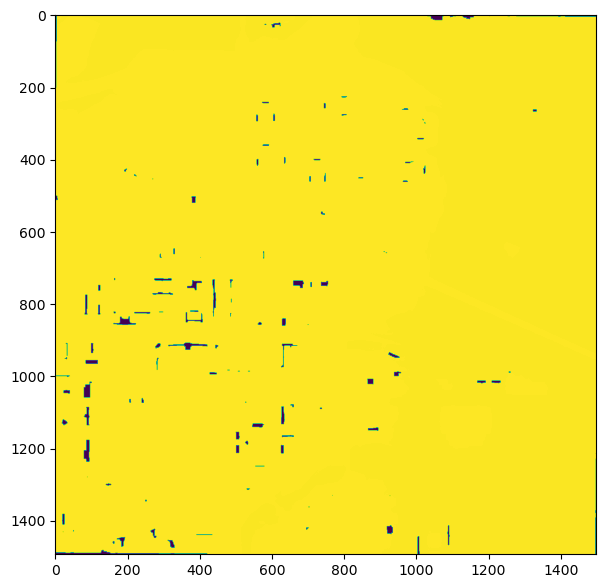

In [47]:
array= data1.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(9, 7))
plt.imshow(array)
plt.colorbar
plt.show(block=False)

In [13]:
print(data1.GetGeoTransform())

(446112.3908587211, 1.0, 0.0, 4654068.192733061, 0.0, -1.0)


In [14]:
print(data1.GetProjection())

PROJCS["NAD83 / UTM zone 15N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26915"]]


In [20]:
#get the data reprojected
data1_reproj= gdal.Warp("rpj/iowaReprj.tif",data1,dstSRS="EPSG:4326")

In [21]:
data1_reproj.GetProjection()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

And here we can notice the adat is really  transform on WGS84 as we expected

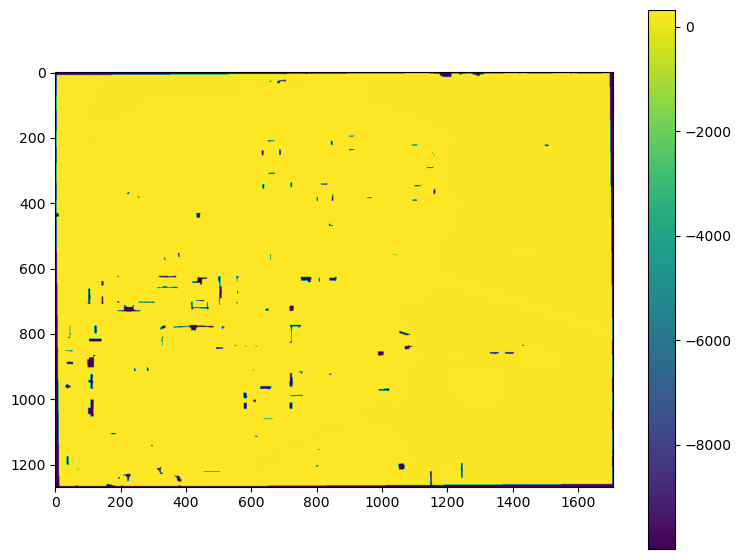

In [46]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(9, 7))
array= data1_reproj.GetRasterBand(1).ReadAsArray()
plt.imshow(array)
plt.colorbar()
plt.show(block=False)

# Getting elevation and coordinates
Here the first things which was made is to  extract from the file data1_reprojected  the elevation and the coordinates 


In [53]:
data_elev=gdal.Translate("data/elevation_data.xyz",data1_reproj)



In [66]:
#data_elev =None
data1= pd.read_csv("data/elevation_data.xyz",sep=" ",header=None)
data1.columns=["X","Y","Elevation"]



In [70]:
data1.sort_values("Elevation", ascending=True)
#data1.head()

,X,Y,Elevation
0,-93.651043,42.036906,-9999.000000
1185347,-93.632849,42.029502,-9999.000000
1185346,-93.632860,42.029502,-9999.000000
1184148,-93.645659,42.029502,-9999.000000
1184147,-93.645669,42.029502,-9999.000000
...,...,...,...
1720194,-93.648500,42.026147,317.609985
1720193,-93.648511,42.026147,317.609985
1723621,-93.648383,42.026126,317.660004
1723619,-93.648404,42.026126,317.660004


### Save to csv file

In [79]:
data1.to_csv("data/elevation.csv",index=False)